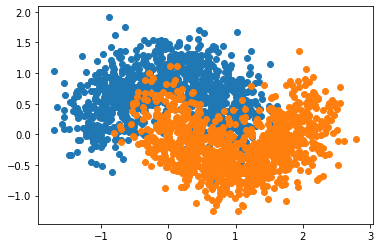

In [75]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_moons(n_samples=2000, noise=0.3, random_state=42)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('lr:', lr.score(X_test, y_test))

svc =SVC()
svc.fit(X_train, y_train)
print('svc:', svc.score(X_test, y_test))

dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('dt:', dt.score(X_test, y_test))


lr: 0.862
svc: 0.914
dt: 0.866


In [77]:
from sklearn.metrics import accuracy_score
y_predict1 = lr.predict(X_test)
y_predict2 = svc.predict(X_test)
y_predict3 = dt.predict(X_test)
y_predict = np.array((y_predict1+y_predict2+y_predict3)>=2, dtype='int')

accuracy_score(y_test, y_predict)


0.91

In [78]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('svc', SVC()),
    ('dt', DecisionTreeClassifier())], voting='hard')

clf.fit(X_train, y_train)
clf.score(X_test, y_test)



0.916